<a href="https://colab.research.google.com/github/Sangyubs/nlp-with-pytorch-exercise-/blob/main/230524_1%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.2 샘플, 타깃의 인코딩
- 원핫
- TF
- TF-IDF
- 타깃 인코딩


### 원핫벡터 또는 이진 표현 만들기.


#### **!!!이진벡터, 희소행렬 -> array**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies like an arrow',
          'Fruit flies like a banana']

one_hot_vectorizer = CountVectorizer(binary=True) # binary=True : all non zero counts are set to 1
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray() # vectorizer는 희소행렬인 csr 반환, toarray()를 통해 넘파이 어레이로 변환
vocab = one_hot_vectorizer.get_feature_names_out()
print(vocab)
print(one_hot)


['an' 'arrow' 'banana' 'flies' 'fruit' 'like' 'time']
[[1 1 0 1 0 1 1]
 [0 0 1 1 1 1 0]]


<Axes: >

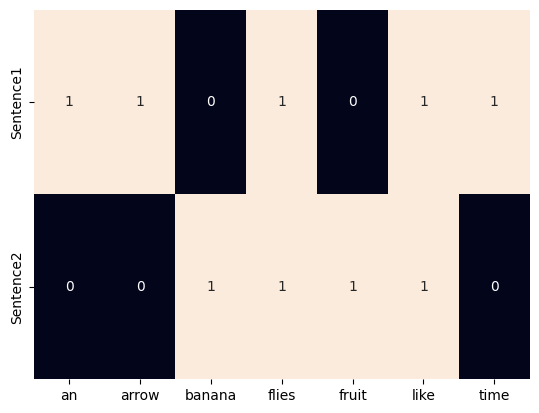

In [ ]:
sns.heatmap(one_hot, annot = True,
            cbar = False, xticklabels = vocab,
            yticklabels = ['Sentence1', 'Sentence2'])

In [ ]:
corpus_2 = ['Time flies like an flies']
one_hot = one_hot_vectorizer.fit_transform(corpus_2).toarray()
one_hot


array([[1, 1, 1, 1]])

# 1.4 파이토치 연습

## 텐서만들기


In [3]:
import torch

In [4]:
# 헬퍼 함수

def describe(x):
  print('타입 : {}'.format(x.type()))
  print('크기 : {}'.format(x.shape))
  print('값 : \n{}'.format(x))

In [6]:
describe(torch.Tensor(2, 3))

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[-6.0940e-37, -5.5553e-38, -8.6781e-07],
        [ 4.5831e-41,  1.3661e-38,  0.0000e+00]])


In [7]:
describe(torch.rand(2,3))

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0.6706, 0.0898, 0.4067],
        [0.4632, 0.1266, 0.3527]])


In [8]:
describe(torch.randn(2, 3))

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[-1.0307,  0.6460, -0.0065],
        [ 0.3045, -0.2209,  0.0094]])


In [9]:
describe(torch.zeros(2, 3))

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [10]:
describe(torch.ones(2, 3 ))

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [12]:
x = torch.Tensor(2, 3)
x.fill_(2)
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [13]:
x = torch.Tensor([[1,2,3],
                  [4,5,6]])
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [14]:
import numpy as np
npy = np.random.rand(2, 3)
x = torch.from_numpy(npy)
describe(x)

타입 : torch.DoubleTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0.3057, 0.6959, 0.9078],
        [0.5463, 0.9959, 0.1161]], dtype=torch.float64)


In [15]:
x.fill_(55)

tensor([[55., 55., 55.],
        [55., 55., 55.]], dtype=torch.float64)

In [17]:
x = torch.arange(6).view(2,3)
describe(x)

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [19]:
x = torch.Tensor([[1, 2, 3],
                  [4, 5, 6]])
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [20]:
x = x.long()

In [21]:
describe(x)

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1, 2, 3],
        [4, 5, 6]])


#### **!!!tensor 만들기**
- tensor, Tensor

In [26]:
# torch.Tensor은 FloatTensor 반환 / torch.tensor은 자동으로 dtype에 맞는 Tensor 반환, 또한 dtype을 별도 설정 가능
# 기억은 1) 만들때 dtype지정은 torch.tensor로 이후 지정은 메서드로(long,, float, double)
# 임의의 tensor를 만들땐 torch.Tensor(tensor 은 데이터를 받음)
x = torch.tensor([[1, 2, 3],  
                  [4, 5, 6]], dtype = torch.int64)
describe(x)

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [27]:
x = x.float()
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [29]:
x = x.double()
describe(x)

타입 : torch.DoubleTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)


In [30]:
x = torch.randn(2, 3)
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[ 0.2652,  0.6575,  0.3677],
        [-1.0468,  0.2494,  1.8321]])


In [32]:
describe(torch.add(x, x))

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[ 0.5305,  1.3150,  0.7354],
        [-2.0936,  0.4987,  3.6642]])


In [33]:
describe(x + x + x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[ 0.7957,  1.9725,  1.1031],
        [-3.1404,  0.7481,  5.4963]])


In [35]:
x = torch.arange(6).view(2,3)
describe(x)

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [36]:
describe(torch.sum(x, dim = 0))

타입 : torch.LongTensor
크기 : torch.Size([3])
값 : 
tensor([3, 5, 7])


In [37]:
describe(torch.transpose(x, 0, 1))

타입 : torch.LongTensor
크기 : torch.Size([3, 2])
값 : 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [38]:
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [39]:
describe(x[:1, :2])

타입 : torch.LongTensor
크기 : torch.Size([1, 2])
값 : 
tensor([[0, 1]])


In [41]:
describe(torch.index_select(x, dim = 1, index = torch.tensor([0,2])))

타입 : torch.LongTensor
크기 : torch.Size([2, 2])
값 : 
tensor([[0, 2],
        [3, 5]])


In [42]:
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [43]:
row_indices = torch.arange(2).long()
col_indices = torch.tensor([0, 2], dtype = torch.int64)
describe(x[torch.tensor([0,1]), torch.tensor([0,2])])

타입 : torch.LongTensor
크기 : torch.Size([2])
값 : 
tensor([0, 5])


In [44]:
describe(torch.arange(10))

타입 : torch.LongTensor
크기 : torch.Size([10])
값 : 
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [49]:
x = torch.arange(0,20)
x = x.view(2,2,5)

In [50]:
x[1,1,3]

tensor(18)

In [51]:
x

tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]],

        [[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]]])

In [52]:
x = torch.arange(12).view(3,4)
y = torch.arange(4)
describe(x)
describe(y)

타입 : torch.LongTensor
크기 : torch.Size([3, 4])
값 : 
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
타입 : torch.LongTensor
크기 : torch.Size([4])
값 : 
tensor([0, 1, 2, 3])


In [57]:
x+y

tensor([[ 0,  2,  4,  6],
        [ 4,  6,  8, 10],
        [ 8, 10, 12, 14]])

In [59]:
x = torch.arange(12).view(3,4)
print(x.shape)
x = x.unsqueeze(dim = 1)
print(x.shape)

torch.Size([3, 4])
torch.Size([3, 1, 4])


In [62]:
x = x.unsqueeze(dim = -1)

In [64]:
x.shape

torch.Size([3, 1, 1, 4, 1])

In [65]:
x = x.squeeze()

In [66]:
x.shape

torch.Size([3, 4])

In [67]:
x = torch.arange(12).reshape(3, 4)
y = torch.arange(10, 13).reshape(3,1)

In [69]:
x.add_(y)
x

tensor([[10, 11, 12, 13],
        [15, 16, 17, 18],
        [20, 21, 22, 23]])

In [70]:
x = torch.arange(6).view(2,3)
describe(x)
describe(torch.cat([x, x], dim = 0))
describe(torch.cat([x, x], dim = 1))

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0, 1, 2],
        [3, 4, 5]])
타입 : torch.LongTensor
크기 : torch.Size([4, 3])
값 : 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
타입 : torch.LongTensor
크기 : torch.Size([2, 6])
값 : 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [71]:
describe(torch.stack([x, x]))

타입 : torch.LongTensor
크기 : torch.Size([2, 2, 3])
값 : 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [74]:
batch_size = 3
seq_size = 4
feature_size = 5
x = torch.arange(batch_size * seq_size * feature_size).view(batch_size, seq_size, feature_size)
describe(x)

타입 : torch.LongTensor
크기 : torch.Size([3, 4, 5])
값 : 
tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])


In [75]:
x.transpose(1,0)

tensor([[[ 0,  1,  2,  3,  4],
         [20, 21, 22, 23, 24],
         [40, 41, 42, 43, 44]],

        [[ 5,  6,  7,  8,  9],
         [25, 26, 27, 28, 29],
         [45, 46, 47, 48, 49]],

        [[10, 11, 12, 13, 14],
         [30, 31, 32, 33, 34],
         [50, 51, 52, 53, 54]],

        [[15, 16, 17, 18, 19],
         [35, 36, 37, 38, 39],
         [55, 56, 57, 58, 59]]])

In [76]:
x.transpose(0,1)

tensor([[[ 0,  1,  2,  3,  4],
         [20, 21, 22, 23, 24],
         [40, 41, 42, 43, 44]],

        [[ 5,  6,  7,  8,  9],
         [25, 26, 27, 28, 29],
         [45, 46, 47, 48, 49]],

        [[10, 11, 12, 13, 14],
         [30, 31, 32, 33, 34],
         [50, 51, 52, 53, 54]],

        [[15, 16, 17, 18, 19],
         [35, 36, 37, 38, 39],
         [55, 56, 57, 58, 59]]])

In [77]:
x.permute(1,0,2).shape


torch.Size([4, 3, 5])

In [80]:
x.permute(2,0,1)

tensor([[[ 0,  5, 10, 15],
         [20, 25, 30, 35],
         [40, 45, 50, 55]],

        [[ 1,  6, 11, 16],
         [21, 26, 31, 36],
         [41, 46, 51, 56]],

        [[ 2,  7, 12, 17],
         [22, 27, 32, 37],
         [42, 47, 52, 57]],

        [[ 3,  8, 13, 18],
         [23, 28, 33, 38],
         [43, 48, 53, 58]],

        [[ 4,  9, 14, 19],
         [24, 29, 34, 39],
         [44, 49, 54, 59]]])

In [81]:
x

tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])

In [82]:
x.permute(2,0,1)[:,0,:]

tensor([[ 0,  5, 10, 15],
        [ 1,  6, 11, 16],
        [ 2,  7, 12, 17],
        [ 3,  8, 13, 18],
        [ 4,  9, 14, 19]])

In [83]:
x = torch.arange(6).view(2,3)
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [84]:
x.transpose(0,1)

tensor([[0, 3],
        [1, 4],
        [2, 5]])

In [85]:
x.view(3,2)

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [86]:
def f(x):
    if (x.data > 0).all():
        return torch.sin(x)
    else:
        return torch.cos(x)

In [87]:
x = torch.tensor([1.0, 0.5], requires_grad=True)
y = f(x)
y

tensor([0.8415, 0.4794], grad_fn=<SinBackward0>)

In [90]:
torch.sin(torch.tensor([0.5]))

tensor([0.4794])

In [93]:
x = torch.tensor([1.0, -1.0], requires_grad=True)
mask = torch.gt(x, 0)
mask

tensor([ True, False])

In [95]:
x = torch.ones(2, 2, requires_grad = True)
describe(x)
print(x.grad is None)

타입 : torch.FloatTensor
크기 : torch.Size([2, 2])
값 : 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [96]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

타입 : torch.FloatTensor
크기 : torch.Size([2, 2])
값 : 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [97]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

타입 : torch.FloatTensor
크기 : torch.Size([])
값 : 
21.0
False


In [98]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [99]:
type(device)

torch.device

In [ ]:
np.concatenate()



### **!!!device 설정**

In [ ]:
'''
tensor.to(device)
tensor.cuda()
tensor.cpu()

'''

In [102]:
x = torch.Tensor(2,3).unsqueeze(dim = 0)
x

tensor([[[-6.2458e-25,  4.5832e-41,  5.2143e-35],
         [ 0.0000e+00,  4.4842e-44,  0.0000e+00]]])

In [103]:
x.shape

torch.Size([1, 2, 3])

In [104]:
x = x.squeeze()

In [105]:
x.shape

torch.Size([2, 3])

In [106]:
3 + torch.rand(5,3)*4

tensor([[3.9841, 6.3897, 6.6420],
        [3.6367, 5.6079, 4.4468],
        [3.9167, 4.1420, 6.0289],
        [3.4320, 3.1774, 4.2329],
        [4.1527, 5.8088, 4.3921]])

In [107]:
torch.randn(5,3)

tensor([[-1.0671,  0.7887, -0.4880],
        [ 0.1082, -0.5854,  0.5361],
        [ 0.6961,  1.2337,  2.9398],
        [-1.2102,  0.4038, -0.1027],
        [ 0.4189,  0.2222,  0.8435]])

In [109]:
a = torch.tensor([1,1,1,0,1])
torch.nonzero(a, as_tuple = True)

(tensor([0, 1, 2, 4]),)

In [110]:
x = torch.tensor([[1, 2],
                  [3, 4]])

In [111]:
x.expand(3, 2)

RuntimeError: ignored

In [112]:
a = torch.rand(1, 1, 3)
print(a.size()) # [1, 1, 3]
b = a.expand(4, -1, -1)
print(b.size()) # [4, 1, 3

torch.Size([1, 1, 3])
torch.Size([4, 1, 3])


In [113]:
b

tensor([[[0.4464, 0.9355, 0.0495]],

        [[0.4464, 0.9355, 0.0495]],

        [[0.4464, 0.9355, 0.0495]],

        [[0.4464, 0.9355, 0.0495]]])

In [115]:
a = torch.rand(3,4,5)
b = torch.rand(3,5,4)
torch.bmm(a, b).shape

torch.Size([3, 4, 4])